In [12]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [13]:
import pandas as pd
import numpy as np
import bambi as bmb

# Dataset

In [5]:
dat = pd.read_csv("https://raw.githubusercontent.com/devmanac/Practice-Projects/main/titanic_dataset/Titanic.csv", index_col=0)

dat["PClass"] = dat["PClass"].str.replace("[st, nd, rd]", "", regex=True)
dat["PClass"] = dat["PClass"].str.replace("*", "0").astype(int)
dat["PClass"] = dat["PClass"].replace(0, np.nan)
dat["PClass"] = pd.Categorical(dat["PClass"], ordered=True)
dat["SexCode"] = pd.Categorical(dat["SexCode"], ordered=True)

dat = dat.dropna(axis=0, how="any")    

In [7]:
dat

,Name,PClass,Age,Sex,Survived,SexCode
rownames,,,,,,
1,"Allen, Miss Elisabeth Walton",1.0,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1.0,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1.0,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1.0,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1.0,0.92,male,1,0
...,...,...,...,...,...,...
1309,"Zakarian, Mr Artun",3.0,27.00,male,0,0
1310,"Zakarian, Mr Maprieder",3.0,26.00,male,0,0
1311,"Zenni, Mr Philip",3.0,22.00,male,0,0


# Model

In [10]:
titanic_model = bmb.Model(
    "Survived ~ PClass * SexCode * Age", 
    data=dat, 
    family="bernoulli"
)
titanic_idata = titanic_model.fit(
    draws=500, 
    tune=500, 
    target_accept=0.95, 
    random_seed=1234
)

Modeling the probability that Survived==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, PClass, SexCode, PClass:SexCode, Age, PClass:Age, SexCode:Age, PClass:SexCode:Age]


Output()

Sampling 2 chains for 500 tune and 500 draw iterations (1_000 + 1_000 draws total) took 57 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


# Comparison 

comparisons and plot_comparisons also allow you to specify the type of comparison to be computed. By default, a difference is used. However, it is also possible to take the ratio where comparisons would then become average predictive ratios. To achieve this, pass "ratio" into the argument comparison_type. Using different comparison types offers a way to produce alternative insights; especially when there are interaction terms as the value of one covariate depends on the value of the other covariate.

Default computed for conditional variable: Age, SexCode


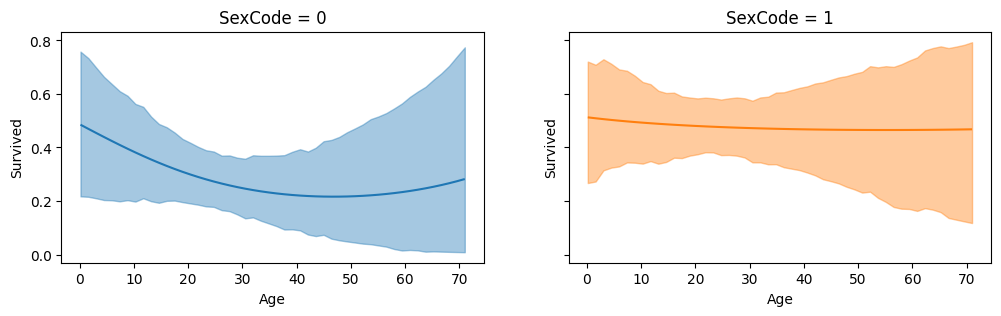

In [14]:
fig, ax = bmb.interpret.plot_comparisons(
    model=titanic_model,
    idata=titanic_idata,
    contrast={"PClass": [1, 3]},
    conditional=["Age", "SexCode"],
    comparison_type="ratio",
    subplot_kwargs={"main": "Age", "group": "SexCode", "panel": "SexCode"},
    fig_kwargs={"figsize":(12, 3), "sharey": True},
    legend=False

)